In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('./jm1.csv')

In [4]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [22]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1


In [5]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [6]:
df['uniq_Op'] = pd.to_numeric(df['uniq_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['uniq_Opnd'] = pd.to_numeric(df['uniq_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['branchCount'] = pd.to_numeric(df['branchCount'], errors='coerce') ## convert to number, make NaNs from ?s 
df['defects'] = df['defects'].astype(int)

df = df.dropna()
df = df.reset_index(drop=True)

df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,...,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,673.772003,0.135352,14.177339,29.43885,3.684563e+04,...,26.253125,2.738787,4.625092,0.370956,11.177592,16.751857,68.110588,46.388989,11.292316,0.193290
std,76.608641,13.021924,6.772697,9.118682,249.549291,1939.253379,0.160552,18.712325,34.42332,4.344671e+05,...,59.622819,9.010486,9.969914,1.908391,10.045255,26.667883,151.513836,100.351845,22.597617,0.394897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.86000,1.619400e+02,...,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.92500,2.031020e+03,...,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,620.850000,0.160000,18.902500,36.78000,1.141615e+04,...,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.78000,3.107978e+07,...,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000,1.000000


In [7]:
from sklearn import model_selection

# Split-out validation dataset
array = df.values
X = array[:,0:21]
Y = array[:,21]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))
print("2. Confusion Matrix:n{}".format(pd.crosstab(Y_validation, predictions, rownames=['True'], colnames=['Predicted'])))

1. Accuracy: 0.8239889705882353
2. Confusion Matrix:nPredicted   0.0  1.0
True                
0.0        1768   23
1.0         360   25


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df_modified = df.drop(df[to_drop], axis=1)

df_modified.describe()

<ipython-input-9-b4011c04f44f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,loc,v(g),ev(g),iv(g),n,l,d,i,e,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,0.135352,14.177339,29.43885,3.684563e+04,2.738787,4.625092,0.370956,11.177592,16.751857,0.193290
std,76.608641,13.021924,6.772697,9.118682,249.549291,0.160552,18.712325,34.42332,4.344671e+05,9.010486,9.969914,1.908391,10.045255,26.667883,0.394897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,0.030000,3.000000,11.86000,1.619400e+02,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,0.080000,9.090000,21.92500,2.031020e+03,0.000000,2.000000,0.000000,11.000000,11.000000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,0.160000,18.902500,36.78000,1.141615e+04,2.000000,5.000000,0.000000,16.000000,21.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,1.300000,418.200000,569.78000,3.107978e+07,344.000000,447.000000,108.000000,411.000000,1026.000000,1.000000


In [10]:
array.shape[1]

22

In [11]:
array = df_modified.values

cols = array.shape[1]

X = array[:,0:cols-1]
Y = array[:,cols-1]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))
print("2. Confusion Matrix:\n{}".format(pd.crosstab(Y_validation, predictions, rownames=['True'], colnames=['Predicted'])))

1. Accuracy: 0.8161764705882353
2. Confusion Matrix:
Predicted   0.0  1.0
True                
0.0        1732   59
1.0         341   44


Feature ranking:
1. feature 0 (0.146212)
2. feature 1 (0.084940)
3. feature 3 (0.074496)
4. feature 7 (0.074332)
5. feature 10 (0.073997)
6. feature 13 (0.073984)
7. feature 4 (0.072670)
8. feature 8 (0.067750)
9. feature 6 (0.066120)
10. feature 12 (0.065813)
11. feature 2 (0.058908)
12. feature 5 (0.057062)
13. feature 9 (0.051533)
14. feature 11 (0.032183)


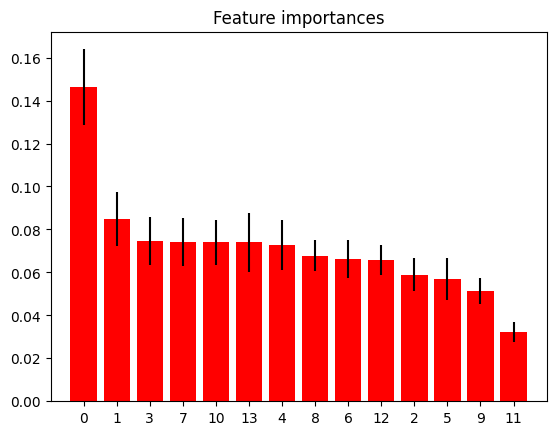

In [12]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
X_modified = array[:,indices[0:5]]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_modified, Y, test_size=0.2, random_state=7)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))
print("2. Confusion Matrix:\n{}".format(pd.crosstab(Y_validation, predictions, rownames=['True'], colnames=['Predicted'])))

1. Accuracy: 0.8267463235294118
2. Confusion Matrix:
Predicted   0.0  1.0
True                
0.0        1766   25
1.0         352   33


In [14]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(X_train, Y_train)
predictions = clf.predict(X_validation)
shaped = clf.predict_proba(X_validation).shape

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))

1. Accuracy: 0.8267463235294118


In [15]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000).fit(X_train, Y_train)
predictions = clf.predict(X_validation)
shaped = clf.predict_proba(X_validation).shape

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))

1. Accuracy: 0.8230698529411765


In [16]:
def accuracies_for_selectedtopfeatures(df, num_top_features=1):
    # Split-out validation dataset
    array = df_modified.values
    cols = array.shape[1]
    
    X = array[:,0:cols-1]
    Y = array[:,cols-1]

    # Get Training and Validation sets
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
    
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    ### Let's grab the top features.
    X_modified = array[:,indices[0:num_top_features]]
    
    # Get Training and Validation sets
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_modified, Y, test_size=0.2, random_state=7)
    
    from sklearn.linear_model import LogisticRegressionCV
    clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(X_train, Y_train)
    predictions = clf.predict(X_validation)
    return accuracy_score(Y_validation, predictions)

In [17]:
top_five = accuracies_for_selectedtopfeatures(df, 5)
print(top_five)

top_four = accuracies_for_selectedtopfeatures(df, 4)
print(top_four)

top_three = accuracies_for_selectedtopfeatures(df, 3)
print(top_three)

0.8267463235294118
0.8267463235294118
0.8244485294117647


In [18]:
print(df.columns[indices[0:4]], importances[indices[0:4]])

Index(['loc', 'v(g)', 'iv(g)', 'd'], dtype='object') [0.14621159 0.0849397  0.07449589 0.07433222]


# PCA

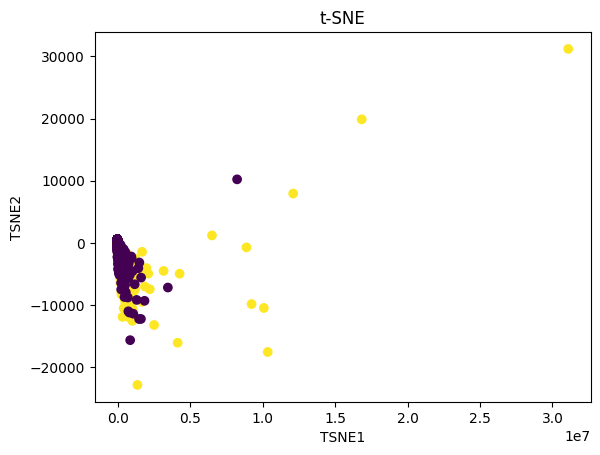

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Separate the features and the labels
X = df.drop('defects', axis=1)
y = df['defects']

# Perform PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE with two components
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the PCA graph

# Plot the t-SNE graph


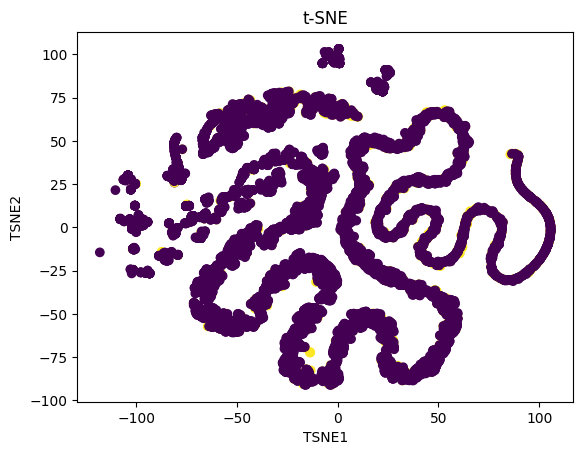

In [26]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE')

plt.show()

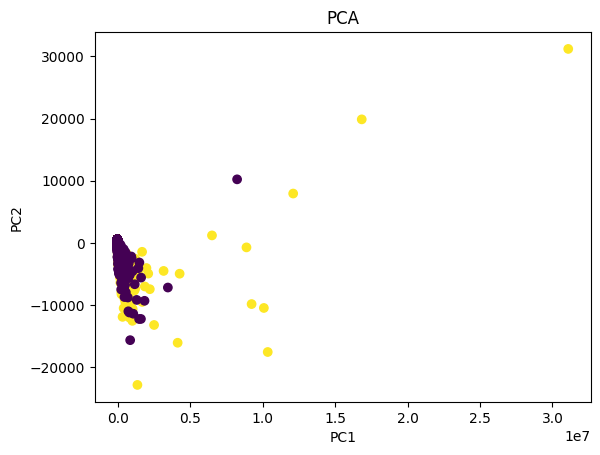

In [25]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [30]:
from sklearn.ensemble import IsolationForest
import pandas as pd



# Fit an isolation forest model to the data
model = IsolationForest(contamination=0.01) # Set the contamination parameter based on the expected proportion of anomalies
model.fit(df.drop('defects', axis=1))

# Predict the anomalies
anomalies = df[model.predict(df.drop('defects', axis=1)) == -1]

print(len(anomalies))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


109


In [31]:
anomalies.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
17,250.0,49.0,34.0,16.0,1469.0,9673.31,0.01,97.00,99.72,938311.06,...,139,92,17,0,32.0,64.0,1081.0,388.0,97.0,1
251,240.0,40.0,6.0,34.0,1098.0,7648.43,0.01,90.63,84.39,693194.02,...,144,55,31,8,38.0,87.0,683.0,415.0,74.0,1
280,469.0,2.0,1.0,2.0,1186.0,8191.57,0.02,43.85,186.83,359168.94,...,283,130,47,7,16.0,104.0,616.0,570.0,3.0,1
283,463.0,94.0,52.0,68.0,1756.0,12727.36,0.01,71.81,177.24,913945.71,...,393,34,34,0,26.0,126.0,1060.0,696.0,187.0,1
301,415.0,9.0,1.0,8.0,2057.0,15427.18,0.02,55.06,280.16,849494.97,...,384,2,27,0,19.0,162.0,1118.0,939.0,17.0,1


In [32]:
anomalies["defects"].value_counts()

1    75
0    34
Name: defects, dtype: int64

In [33]:
!pip install pyod

In [37]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

data = df.copy()

# Fit a LOF model to the data
model = LocalOutlierFactor(n_neighbors=3) # Set the number of neighbors based on the density of the data
model.fit_predict(data.drop('defects', axis=1))

# Predict the anomalies
anomalies = data[model.negative_outlier_factor_ > 3]

anomalies.head()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects


In [35]:
from pyod.models.cblof import CBLOF
import pandas as pd


# Fit a CBLOF model to the data
model = CBLOF(contamination=0.01) # Set the contamination parameter based on the expected proportion of anomalies
model.fit(data.drop('defects', axis=1))

# Predict the anomalies
anomalies = data[model.predict(data.drop('defects', axis=1)) == -1]

anomalies.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
